In [11]:
from typing import Self
import numpy as np

class CameraMatrix:
    __slots__ = ('m',)

    def __init__(self, m: np.ndarray) -> None:
        self.m = m

    def __matmul__(self, p: np.ndarray) -> np.ndarray:
        p = [p[0], p[1], 1]
        projected = self.m @ p
        return projected[:-1]
    
    def __str__(self) -> str:
        return str(self.m)
    
    def __repr__(self) -> str:
        return str(self.m)

class Camera:

    def __init__(self, window_size: np.ndarray, positon: np.ndarray, zoom: float = 1.0) -> None:
        
        self.position = positon
        self.zoom = zoom

        self._window_shift: np.ndarray = np.array([
            [1, 0, window_size[0] / 2],
            [0, 1, window_size[1] / 2],
            [0, 0, 1]
        ])

        self.worldToScreen: CameraMatrix = None
        self.screenToWorld: CameraMatrix = None
        self.update()

    def update(self):

        translation = np.array([
            [1, 0, -self.position[0]],
            [0, 1, -self.position[1]],
            [0, 0, 1]
        ])

        scaling = np.array([
            [self.zoom, 0, 0],
            [0, self.zoom, 0],
            [0, 0, 1]
        ])

        self.worldToScreen = CameraMatrix(self._window_shift @ scaling @ translation)
        self.screenToWorld = CameraMatrix(np.linalg.inv(self.worldToScreen))


    def moveBy(self, by: np.ndarray):
        self.position = self.position + by
        self.update()

    def zoomBy(self, by: float):
        self.zoom += by
        self.update()


c = CameraMatrix(np.random.random((3, 3)))
c @ np.random.random(2)


array([0.64999744, 1.03000474])

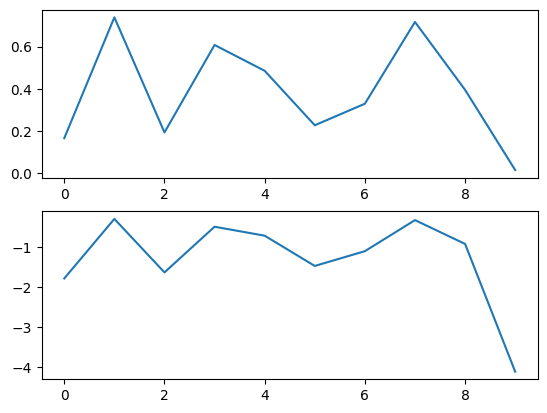

In [53]:
import numpy as np
from matplotlib import pyplot as plt
samples = np.random.random(10)

fig, ax = plt.subplots(2)

log_samples = np.log(samples)

ax[0].plot(samples, label="samples")
ax[1].plot(log_samples, label="log")

plt.show()


In [62]:
import numpy as np

l = np.arange(10 * 10).reshape((10, 10))

from_coord = (1, 1)
to_coord = (3, 3)

print(l)
print(l[1:4, 1:3])

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[11 12]
 [21 22]
 [31 32]]


In [74]:
l = np.arange(6).reshape((3, 2))

l[((0, 0), (1, 0))]

array([1, 0])

In [142]:
wsize_f = 20
wsize = np.array([-wsize_f, wsize_f])
TL_world = np.array([-wsize_f, -wsize_f])
size = 2
walls = np.random.choice([0, 1], size=(20, 20))
pos = np.random.random((8, 2)) * 10 - 5
tomid = np.ones(2) * (size / 2)
tobr = np.ones(2) * (size)

walls

array([[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1,

In [173]:


def vectorized_world_to_cell(positions: np.ndarray) -> np.ndarray:
    """
    positions (n_entities, 2)
    """
    positions = positions - TL_world
    return (positions // size).astype(int)

def vectorized_cell_to_world(positions: np.ndarray, placement: int = 1) -> np.ndarray:
    out = (positions).astype(float) * size + TL_world

    if placement == 1:
        out = out + tomid

    if placement == 2:
        out = out + tobr
    
    
    return out


cell_inds = vectorized_world_to_cell(pos)
cell_pos = vectorized_cell_to_world(cell_inds)
wall_inds = tuple(cell_inds.T)

wall_value = walls[wall_inds]
collide_mask = np.isclose(wall_value, 0.0)
print(collide_mask.sum()) 

# Collision
collision_cell_pos = cell_pos[collide_mask]
collision_ent_pos = pos[collide_mask]

# Find push vector cell pos -> ent pos + handle case where cell pos == ent pos
same_pos_mask = collision_cell_pos == collision_ent_pos
collision_ent_pos[same_pos_mask] = (
    collision_ent_pos[same_pos_mask] +
    0.01 * np.random.random(collision_ent_pos[same_pos_mask].shape)
)
collision_push_vector = collision_ent_pos - collision_cell_pos

# Normalize 
collision_push_mag = np.linalg.norm(collision_push_vector, axis=1)
collision_push_vector = collision_push_vector / collision_push_mag[:, np.newaxis]

# Find the distance between the ent ant the grid cell
collision_cell_TL = collision_cell_pos - tomid
collision_cell_BR = collision_cell_pos + tomid

collison_rect_dx = np.min(
    np.vstack((collision_ent_pos[:, 0] - collision_cell_TL[:, 0],
    collision_cell_BR[:, 0] - collision_ent_pos[:, 0])),
    axis=0
)
collison_rect_dy = np.min(
    np.vstack((collision_ent_pos[:, 1] - collision_cell_TL[:, 1],
    collision_cell_BR[:, 1] - collision_ent_pos[:, 1])),
    axis=0 
)

collision_distance = np.sqrt(collison_rect_dx * collison_rect_dx + collison_rect_dy * collison_rect_dy)
collision_push_vector = collision_push_vector * collision_distance[:, np.newaxis]

pos[collide_mask] = pos[collide_mask] + collision_push_vector
pos




0


array([[-2.05859768e+00, -6.98638172e-01],
       [-2.68603102e+00, -1.88992913e+00],
       [-2.04493063e+00,  1.95838435e+00],
       [-3.55336128e-09,  2.00000000e+00],
       [ 4.98514906e+00, -9.95601678e-01],
       [-2.00000005e+00, -4.00000005e+00],
       [ 3.63724559e+00,  1.69275856e+00],
       [ 2.97349249e+00, -2.85866940e+00]])

In [182]:

def find_closest_points(source_points, target_points):
    # source_points: numpy array of shape (N, 2)
    # target_points: numpy array of shape (4, N, 2)
    
    # Compute the Euclidean distances between each source point and all target points
    # target_points has shape (4, N, 2), source_points has shape (N, 2)
    # We need to broadcast source_points to shape (4, N, 2) to compute distances
    distances = np.linalg.norm(target_points - source_points[np.newaxis, :, :], axis=2)
    
    # Find the index of the closest target point for each source point
    closest_indices = np.argmin(distances, axis=0)
    
    # Use the indices to select the closest target points
    closest_points = target_points[closest_indices, np.arange(source_points.shape[0])]
    
    return closest_points

# Example usage:
N = 5  # Number of points
source_points = np.random.rand(N, 2)
target_points = np.random.rand(4, N, 2)
find_closest_points(source_points, target_points)

array([[0.67860895, 0.95341899],
       [0.52205924, 0.2715618 ],
       [0.56121469, 0.05312261],
       [0.32606696, 0.66470282],
       [0.65989488, 0.09460009]])

In [187]:
c1 = np.arange(5)
c2 = np.arange(5)

np.vstack((c1, c2)).shape


(2, 5)

In [120]:
import math

def distance(rect, p):
    dx = max(rect['min']['x'] - p['x'], p['x'] - rect['max']['x'])
    dy = max(rect['min']['y'] - p['y'], p['y'] - rect['max']['y'])
    return math.sqrt(dx * dx + dy * dy)

rect = {
    'min': {'x': 1, 'y': 2},
    'max': {'x': 4, 'y': 6}
}

p = {'x': 3, 'y': 3}

print(distance(rect, p))  # Output will be the distance

1.4142135623730951


In [44]:
import numpy as np
N = 4

agent_position = np.random.random((N, 2)) * 10
agent_angle = np.random.random(N) * 2 * np.pi
fov_alpha = np.pi / 3
vision_length = 5
vision_spread = np.tan(fov_alpha / 2) * vision_length
triangle_area = (vision_length * vision_spread * 2) / 2
in_triangle_formula_term = (1 / (triangle_area * 2))

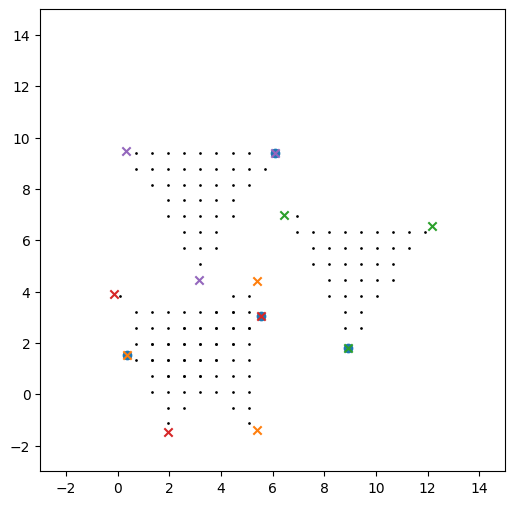

In [45]:
from matplotlib import pyplot as plt


def in_triangle(triangle: np.ndarray, points: np.ndarray) -> np.ndarray:
        # https://stackoverflow.com/a/14382692/7020366

        p0, p1, p2 = triangle
        px, py = points.T
        p0x, p0y = p0
        p1x, p1y = p1
        p2x, p2y = p2

        s = in_triangle_formula_term * (p0y * p2x - p0x * p2y + (p2y - p0y) * px + (p0x - p2x) * py)
        t = in_triangle_formula_term * (p0x * p1y - p0y * p1x + (p0y - p1y) * px + (p1x - p0x) * py)

        return (s > 0) & (t > 0) & ((1 - s - t) > 0)

def generate_triangles() -> np.ndarray:

        pos = agent_position

        triangles = np.empty((3, pos.shape[0], 2))
        triangles[0, :, :] = pos

        heading = np.empty_like(pos)
        heading[:, 0] = np.cos(agent_angle)
        heading[:, 1] = np.sin(agent_angle)

        orthogonal = np.empty_like(heading) 
        orthogonal[:, 0] = heading[:, 1]
        orthogonal[:, 1] = -heading[:, 0]
        orthogonal = orthogonal * vision_spread

        heading_end = pos + heading * vision_length

        triangles[1, :, :] = heading_end + orthogonal
        triangles[2, :, :] = heading_end - orthogonal

        return triangles

def generate_uniform_2d_grid(m, n):
    # Create evenly spaced points between 0 and 1 in both dimensions
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, m)
    
    # Create a meshgrid from these points
    X, Y = np.meshgrid(x, y)
    
    # Stack and reshape the grid points into a (m*n, 2) array
    points = np.vstack([X.ravel(), Y.ravel()]).T
    
    return points

triangles = generate_triangles()
test_points = generate_uniform_2d_grid(30, 30) * 18 - 3


fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(*agent_position.T)
ax.set_xlim([-3, 15])
ax.set_ylim([-3, 15])
# ax.scatter(*test_points.T, color="black", s=0.9)
for i_agent in range(triangles.shape[1]):
        ...
        ax.scatter(*triangles[:, i_agent, :].T, marker="x")
        test_in_vision = in_triangle(triangles[:, i_agent, :], test_points)
        in_vision_points = test_points[test_in_vision]
        ax.scatter(*in_vision_points.T, color="black", s=0.9)

In [23]:
from scipy.spatial.distance import pdist
import numpy as np
import time

N = 10_000

agent_pos = np.random.random((N, 2)) * 200
agent_coords = np.random.randint(0, 500, size=(N, 2)).astype(int)

def calc_man_dist(pos):
    pdist(pos, metric="cityblock")

def calc_euc_dist(pos):
    pdist(pos, metric="euclidean")

def calc_dot(pos):
    s = pos @ pos.T
    s[s < 0] *= 2
    

def mine(pos):
    l = agent_coords.astype(int)


In [24]:
%timeit calc_man_dist(agent_coords)

132 ms ± 3.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%timeit calc_euc_dist(agent_coords)

137 ms ± 3.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
%timeit calc_dot(agent_coords)

298 ms ± 25.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:

import importlib
from vision import mmpdist


def inv(i: int, j: int, m: int) -> int:
    return m * i + j - ((i + 2) * (i + 1)) // 2

coords = agent_coords.astype(int) 
%timeit mmpdist(coords)

# n_agents = agent_coords.shape[0]
# for i in range(1, n_agents - 1):
#     for j in range(i + 1, n_agents):
#         I = inv(i, j, n_agents)
        
#         temp = max(
#             abs(agent_coords[i][0] - agent_coords[j][0]), 
#             abs(agent_coords[i][1] - agent_coords[j][1]) 
#         )

#         assert res[I] == temp


67.8 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
coords = np.array([
    [3, 3],
    [0, 0],
    [2, 1],
    [0, 1],
    [0, 0],
    [3, 1],
    [2, 1]
])

density = np.zeros((4, 4), dtype=np.int32)
np.add.at(density, tuple(coords.T), 1)

offsets = np.cumsum(
    np.pad(density.flatten(), (1, 0))
)[:-1].reshape(density.shape)

si = np.lexsort((coords[:, 1], coords[:, 0]))

print(density)
print(offsets)
print(si)

[[2 1 0 0]
 [0 0 0 0]
 [0 2 0 0]
 [0 1 0 1]]
[[0 2 3 3]
 [3 3 3 3]
 [3 3 5 5]
 [5 5 6 6]]
[1 4 3 2 6 5 0]


In [77]:
check = (2, 1)
s = density[check]
o = offsets[check]
there = si[o:(s+o)]
print(there)
print(coords[there, :])

[2 6]
[[2 1]
 [2 1]]


In [79]:
np.arange(9) - 4

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [50]:


def check_alg(m: int):
    print(f"m:{m}")
    l = np.zeros((m, m)) - 1

    size = ((m * m) - m) // 2

    next_i_change = 0
    i = -1
    even_odd_term = 2
    for I in range(size):

        if I == next_i_change:
            i += 1
            next_i_change = I + m - 1 - i
            print(next_i_change)
            even_odd_term = 2 if (((i * i + 3 * i + 2) % 2) == 0) else 1

        j = (i*i - 2*m*i + 3*i + even_odd_term + 2*I) // 2
        check_I = inv(i, j, m)

        if check_I != I:
            raise ValueError(": ((")
        
        l[i, j] = I
    
    return l


check_alg(15)
        
        
    


m:15
14
27
39
50
60
69
77
84
90
95
99
102
104
105


array([[ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
         10.,  11.,  12.,  13.],
       [ -1.,  -1.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.],
       [ -1.,  -1.,  -1.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
         35.,  36.,  37.,  38.],
       [ -1.,  -1.,  -1.,  -1.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
         46.,  47.,  48.,  49.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  60.,  61.,  62.,  63.,  64.,
         65.,  66.,  67.,  68.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  69.,  70.,  71.,  72.,
         73.,  74.,  75.,  76.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  77.,  78.,  79.,
         80.,  81.,  82.,  83.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  84.,  85.,
         86.,  87.,  88.,  89.],
       [ -1.,  -1.,  -1.,  -1.,  -1.,

In [36]:
((4 * 4) - 4) // 2

6

In [6]:

import numpy as np

agents_coords = np.array([
    [0, 0],
    [0, 0],
    [1, 1]
])

N = 2
agents_in_cell = np.empty((N, N), dtype=object)
for i in range(N):
    for j in range(N):
        agents_in_cell[i, j] = []


for i_agent, (i, j) in enumerate(agents_coords):
    agents_in_cell[i, j].append(i_agent)

agents_in_cell


array([[list([0, 1]), list([])],
       [list([]), list([2])]], dtype=object)

In [74]:
def kok():

    print("Before yield")
    yield 2
    print("After yield 2")
    yield "KOKOT"



kok_generator = kok()

next(kok_generator)

Before yield


2

In [75]:
next(kok_generator)

After yield 2


'KOKOT'

In [78]:
kok_generator = kok()
try:
    while True:
        next(kok_generator)
except StopIteration:
    print("Stop for loop")

Before yield
After yield 2
Stop for loop


In [80]:
for _ in kok():
    ...
print("Stop for loop")

Before yield
After yield 2
Stop for loop


62.6724


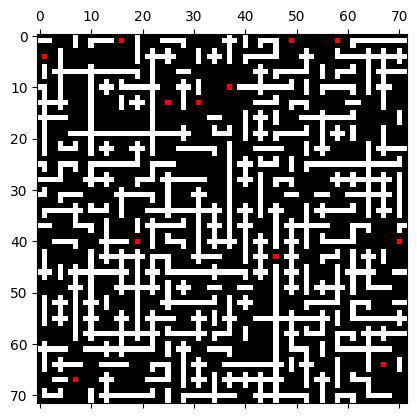

In [16]:
import numpy as np

DOWN = 0
RIGHT = 1
UP = 2
LEFT = 3

vline = 0
hline = 1
cornerBR = 2
cornerBL = 3
cornerTL = 4
cornerTR = 5
empty = 6
cross = 7
one = 8

n_grids_per_side = 3

sides = [
    (UP, (1, 0)),
    (DOWN, (-1, 0)),
    (RIGHT, (0, 1)),
    (LEFT, (0, -1)),
]

rules = [
    { # vline
        UP: {empty, vline, cornerBR, cornerBL, one, cross},
        DOWN: {empty, vline, cornerTL, cornerTR, one, cross},
        LEFT: {empty, cornerBL, cornerTL, one, cross},
        RIGHT: {empty, cornerBR, cornerTR, one, cross},
    },
    { # hline
        LEFT: {empty, hline, cornerTR, cornerBR, one, cross},
        RIGHT: {empty, hline, cornerTL, cornerBL, one, cross},
        DOWN: {empty, cornerBL, cornerBR, one, cross},
        UP: {empty, cornerTR, cornerTL, one, cross},
    }, 
    { # cornerBR
        UP: {empty, cross, one, hline, cornerTL, cornerTR},
        LEFT: {empty, cross, one, vline, cornerTL, cornerBL},
        RIGHT: {cornerTL, cornerBL, hline},
        DOWN: {cornerTL, cornerTR, vline}
    },
    { # cornerBL
        UP: {empty, cross, one, hline, cornerTL, cornerTR},
        RIGHT: {empty, cross, one, vline, cornerTR, cornerBR},
        LEFT: {cornerTR, cornerBR, hline},
        DOWN: {cornerTL, cornerTR, vline}
    },
    { # cornerTL
        DOWN: {empty, cross, one, hline, cornerBL, cornerBR},
        RIGHT: {empty, cross, one, vline, cornerTR, cornerBR},
        LEFT: {cornerTR, cornerBR, hline},
        UP: {cornerBR, cornerBL, vline}
    },
    { # cornerTR
        DOWN: {empty, cross, one, hline, cornerBR, cornerBL},
        LEFT: {empty, cross, one, vline, cornerTL, cornerBL},
        RIGHT: {cornerTL, cornerBL, hline},
        UP: {cornerBR, cornerBL, vline}
    },
    { # empty
        DOWN: {empty, cross, one, vline, hline, cornerBR, cornerBL},
        UP: {empty, cross, one, vline, hline, cornerTR, cornerTL},
        LEFT: {empty, cross, one, vline, hline, cornerTL, cornerBL},
        RIGHT: {empty, cross, one, vline, hline, cornerTR, cornerBR},
    },
    { # full
        DOWN: {empty, cross, one, vline, hline},
        UP: {empty, cross, one, vline, hline},
        LEFT: {empty, cross, one, hline, vline},
        RIGHT: {empty, cross, one, hline, vline},
    },
    { # one
        DOWN: {empty, cross, vline, hline},
        UP: {empty, cross, vline, hline},
        LEFT: {empty, cross, hline, vline},
        RIGHT: {empty, cross, hline, vline},
    },
]

types_to_array = [
    np.array([
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]
    ]),
    np.array([
        [0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]
    ]),
    np.array([
        [0, 0, 0],
        [0, 1, 1],
        [0, 1, 0]
    ]),
    np.array([
        [0, 0, 0],
        [1, 1, 0],
        [0, 1, 0]
    ]),
    np.array([
        [0, 1, 0],
        [1, 1, 0],
        [0, 0, 0]
    ]),
    np.array([
        [0, 1, 0],
        [0, 1, 1],
        [0, 0, 0]
    ]),
    np.array([
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ]),
    np.array([
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ]),
    np.array([
        [0, 0, 0],
        [0, 2, 0],
        [0, 0, 0]
    ]),
]

w_objects = np.array([
    30, # vline
    30, # hline
    10, # corners
    10,
    10,
    10,
    10, # empty
    10, # cross
    1 # one
])

n_grids = 72

N = int(n_grids / n_grids_per_side)
wave = np.full((N, N, len(rules)), True, dtype=bool)

def update_neighbours(io: int, jo: int, world: np.ndarray):

    q = []

    for DIR_TO, (di, dj) in sides:
        ni = io + di
        nj = jo + dj
        q.append((DIR_TO, (ni, nj), (io, jo)))
    
    while len(q) > 0:
        
        DIR_TO_ME, (i, j), (pi, pj) = q.pop(0)

        if (
            (i < 0) or
            (i >= N) or
            (j < 0) or
            (j >= N)
        ):
            continue

        if world[i, j] != -1:
            continue

        previous_possible_objects = np.where(wave[pi, pj])[0]
        if len(previous_possible_objects) == 0:
            previous_possible_objects = [world[pi, pj]]

        possible_objects = np.where(wave[i, j])[0]
        set_possible_objects = set(possible_objects)
        n_possible = len(set_possible_objects)
        allowed_objects = set()

        for i_prev_object in previous_possible_objects:
            allowed_objects |= rules[i_prev_object][DIR_TO_ME]

        set_possible_objects = set_possible_objects.intersection(allowed_objects)

        if n_possible <= len(set_possible_objects):
            continue

        wave[i, j, :] = False
        for possible_i in set_possible_objects:
            wave[i, j, possible_i] = True

        for DIR_TO, (di, dj) in sides:
            ni = i + di
            nj = j + dj
            q.append((DIR_TO, (ni, nj), (i, j)))

def collapse_wave():

    world = np.full((N, N), -1, dtype=int)

    entropy = np.sum(wave, axis=2, dtype=float)
    collapse_mask = entropy > 0
    entropy[~collapse_mask] = np.inf
    
    while np.any(collapse_mask):
        
        # Choose next tile
        min_ent = np.min(entropy)
        inds = np.where(entropy == min_ent)
        tile_choice = np.random.randint(0, inds[0].size)
        c_i, c_j = inds[0][tile_choice], inds[1][tile_choice]

        # Choose the tile type
        possible_colapse = np.where(wave[c_i, c_j])[0]
        weights = w_objects[wave[c_i, c_j]]
        p = weights / weights.sum()
        collapse_choice = np.random.choice(possible_colapse, p=p)
        world[c_i, c_j] = collapse_choice
        wave[c_i, c_j, :] = False

        # Update neighbours
        update_neighbours(c_i, c_j, world)

        entropy = np.sum(wave, axis=2, dtype=float)
        collapse_mask = entropy > 0
        entropy[~collapse_mask] = np.inf

    return world

import time
s = time.perf_counter_ns()
world = collapse_wave()
print((time.perf_counter_ns() - s) / (10 **6))

import matplotlib.pyplot as plt

walls = np.zeros((n_grids, n_grids))

for i in range(N):
    for j in range(N):
        wi = i * 3
        wj = j * 3
        walls[wi:(wi+3), wj:(wj+3)] = types_to_array[world[i, j]]

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cmap = ListedColormap(['k', 'w', "r"])
ax: plt.Axes = ax
ax.matshow(walls, cmap=cmap)


[-1.  1.  2.]


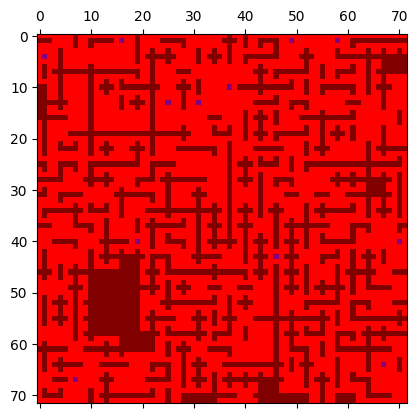

In [18]:
def flood_fill(io: int, jo: int, mark: np.ndarray, mark_value: float):

    N = mark.shape[0]
    stack = [(io, jo)]

    while len(stack) > 0:
        i, j = stack.pop()
    
        if (
            (i < 0) or
            (i >= N) or
            (j < 0) or
            (j >= N)
        ):
            continue

        if mark[i, j] != 0.0:
            continue

        mark[i, j] = mark_value
        
        for _, (di, dj) in sides:
            ni = i + di
            nj = j + dj
            stack.append((ni, nj))


def create_mark():
    mark = np.copy(walls)
    marker = -1
    while True:
        
        non_explored_mask = mark == 0.0
        
        if not non_explored_mask.any():
            break

        non_explored_inds = np.where(non_explored_mask)
        choice = np.random.randint(0, non_explored_inds[0].size)
        i, j = non_explored_inds[0][choice], non_explored_inds[1][choice]

        flood_fill(i, j, mark, marker)
        marker -= 1
    
    return mark

def resolve_boundary():
    
    mark = create_mark()
    
    closed_labels, closed_counts = np.unique(mark[mark < 0], return_counts=True)
    if closed_counts.size == 0:
        return mark
     
    main_area = closed_labels[np.argmax(closed_counts)] 

    for label in closed_labels:

        if main_area == label:
            continue

        walls[mark == label] = 1.0

    return mark

marker = resolve_boundary()
print(np.unique(marker))

colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800000', '#808000', '#008080', '#800080']
cmap = ListedColormap(colors)
fig, ax = plt.subplots()
ax: plt.Axes = ax
ax.matshow(marker, cmap=cmap)
    

In [19]:
import pandas as pd
import numpy as np


pos1 = np.random.random((10, 2))
pos2 = np.random.random((10, 2))

ts = [12, 93]
pos = [pos1, pos2]

for t, pos
pd.DataFrame(pos1)


,0,1
0,0.867942,0.477392
1,0.245385,0.797497
2,0.316046,0.468810
3,0.625233,0.045773
4,0.351866,0.663798
5,0.024568,0.281098
6,0.210642,0.580809
7,0.627998,0.912405
8,0.332049,0.686336
9,0.771184,0.044450


In [ ]:
o

In [44]:
import matplotlib as mpl
import numpy as np

mpl.colormaps["viridis"](np.linspace(0, 2, 10))[:, :3].shape

(10, 3)

In [40]:
paths = [
    [(0, 1), (0, 2)],
    [(0, 1), (0, 3)],
    None
]

paths = np.array(paths, dtype=object)
paths == None

array([False, False,  True])

In [8]:
import numpy as np

t = np.array([
    [0, 0],
    [0, 0],
    [1, 1],
    [0, 0]
])

np.delete(t, [1, 3], axis=0)

array([[0, 0],
       [1, 1]])

In [29]:
df = pd.read_parquet("./data/experiments/2024-09-29_22-35-00_test_53945/MovementEvent.parquet")
df

,x,y,t
0,-459.965271,-444.707550,1003
1,-254.339996,110.360512,1003
2,-630.862915,-9.388422,1003
3,268.881134,300.083557,1003
4,40.952789,-487.970062,1003
...,...,...,...
1903,-1.714578,279.366577,9027
1904,-32.047874,-111.564461,9027
1905,60.662830,0.726330,9027
1906,-162.808609,105.771324,9027
